# By Ahmad Alkaseb & Hanni Salman

## Define business requirement

**Hypothesis**:  
*States with more relaxed gun ownership regulations experience a higher frequency of school shootings compared to states with stricter gun control policies.*

**Name definition of each column:**  
*https://github.com/washingtonpost/data-school-shootings/blob/master/record_layout.csv*

## Data collection

In [143]:
# Importing the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [145]:
# Load the data into a dataframe using pandas library
df = pd.read_csv('school-shootings-data.csv')

## Data cleaning

In [147]:
# Let's have a look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uid                               416 non-null    int64  
 1   nces_school_id                    410 non-null    object 
 2   school_name                       416 non-null    object 
 3   nces_district_id                  392 non-null    float64
 4   district_name                     391 non-null    object 
 5   date                              416 non-null    object 
 6   school_year                       416 non-null    object 
 7   year                              416 non-null    int64  
 8   time                              386 non-null    object 
 9   day_of_week                       416 non-null    object 
 10  city                              416 non-null    object 
 11  state                             416 non-null    object 
 12  school_t

We have 416 rows. We can see that, we have many missing values. Let's fix that.

In [150]:
# Replacing all the string columns with the mode 
df['nces_school_id'] = df['nces_school_id'].fillna(df['nces_school_id'].mode()[0])
df['district_name'] = df['district_name'].fillna(df['district_name'].mode()[0])
df['time'] = df['time'].fillna(df['time'].mode()[0])
df['gender_shooter1'] = df['gender_shooter1'].fillna(df['gender_shooter1'].mode()[0])
df['race_ethnicity_shooter1'] = df['race_ethnicity_shooter1'].fillna(df['race_ethnicity_shooter1'].mode()[0])
df['shooter_relationship1'] = df['shooter_relationship1'].fillna(df['shooter_relationship1'].mode()[0])
df['deceased_notes1'] = df['deceased_notes1'].fillna(df['deceased_notes1'].mode()[0])
df['gender_shooter2'] = df['gender_shooter2'].fillna(df['gender_shooter2'].mode()[0])
df['race_ethnicity_shooter2'] = df['race_ethnicity_shooter2'].fillna(df['race_ethnicity_shooter2'].mode()[0])
df['shooter_relationship2'] = df['shooter_relationship2'].fillna(df['shooter_relationship2'].mode()[0])
df['deceased_notes2'] = df['deceased_notes2'].fillna(df['deceased_notes2'].mode()[0])
df['black'] = df['black'].fillna(df['black'].mode()[0])
df['hispanic'] = df['hispanic'].fillna(df['hispanic'].mode()[0])
df['weapon'] = df['weapon'].fillna(df['weapon'].mode()[0])
df['weapon_source'] = df['weapon_source'].fillna(df['weapon_source'].mode()[0])
df['low_grade'] = df['low_grade'].fillna(df['low_grade'].mode()[0])
df['high_grade'] = df['high_grade'].fillna(df['high_grade'].mode()[0])
df['lunch'] = df['lunch'].fillna(df['lunch'].mode()[0])
df['county'] = df['county'].fillna(df['county'].mode()[0])

In [151]:
# Replacing all the number columns with the mean
df['nces_district_id'] = df['nces_district_id'].fillna(df['nces_district_id'].mean())
df['age_shooter1'] = df['age_shooter1'].fillna(df['age_shooter1'].mean())
df['shooter_deceased1'] = df['shooter_deceased1'].fillna(df['shooter_deceased1'].mean())
df['age_shooter2'] = df['age_shooter2'].fillna(df['age_shooter2'].mean())
df['shooter_deceased2'] = df['shooter_deceased2'].fillna(df['shooter_deceased2'].mean())
df['white'] = df['white'].fillna(df['white'].mean())
df['asian'] = df['asian'].fillna(df['asian'].mean())
df['american_indian_alaska_native'] = df['american_indian_alaska_native'].fillna(df['american_indian_alaska_native'].mean())
df['hawaiian_native_pacific_islander'] = df['hawaiian_native_pacific_islander'].fillna(df['hawaiian_native_pacific_islander'].mean())
df['two_or_more'] = df['two_or_more'].fillna(df['two_or_more'].mean())
df['lat'] = df['lat'].fillna(df['lat'].mean())
df['long'] = df['long'].fillna(df['long'].mean())
df['staffing'] = df['staffing'].fillna(df['staffing'].mean())
df['ulocale'] = df['ulocale'].fillna(df['ulocale'].mean())

In [153]:
# Let's see if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uid                               416 non-null    int64  
 1   nces_school_id                    416 non-null    object 
 2   school_name                       416 non-null    object 
 3   nces_district_id                  416 non-null    float64
 4   district_name                     416 non-null    object 
 5   date                              416 non-null    object 
 6   school_year                       416 non-null    object 
 7   year                              416 non-null    int64  
 8   time                              416 non-null    object 
 9   day_of_week                       416 non-null    object 
 10  city                              416 non-null    object 
 11  state                             416 non-null    object 
 12  school_t

## Data Exploration & Analysis

In [155]:
# Let's have a look at the data
# df

# Get the first 5 rows
#df.head()

# Get 5 random rows
# df.sample(5)

# Get the last 5 rows
# df.tail()

In [156]:
# Get the names of all the columns
df.columns

Index(['uid', 'nces_school_id', 'school_name', 'nces_district_id',
       'district_name', 'date', 'school_year', 'year', 'time', 'day_of_week',
       'city', 'state', 'school_type', 'enrollment', 'killed', 'injured',
       'casualties', 'shooting_type', 'age_shooter1', 'gender_shooter1',
       'race_ethnicity_shooter1', 'shooter_relationship1', 'shooter_deceased1',
       'deceased_notes1', 'age_shooter2', 'gender_shooter2',
       'race_ethnicity_shooter2', 'shooter_relationship2', 'shooter_deceased2',
       'deceased_notes2', 'white', 'black', 'hispanic', 'asian',
       'american_indian_alaska_native', 'hawaiian_native_pacific_islander',
       'two_or_more', 'resource_officer', 'weapon', 'weapon_source', 'lat',
       'long', 'staffing', 'low_grade', 'high_grade', 'lunch', 'county',
       'state_fips', 'county_fips', 'ulocale'],
      dtype='object')

In [157]:
print('Rows: {} Columns: {} Size: {}'.format(df.shape[0], df.shape[1], df.size))

Rows: 416 Columns: 50 Size: 20800


In [159]:
# Get information about the data
df.describe()

,uid,nces_district_id,year,killed,injured,casualties,age_shooter1,shooter_deceased1,age_shooter2,shooter_deceased2,...,american_indian_alaska_native,hawaiian_native_pacific_islander,two_or_more,resource_officer,lat,long,staffing,state_fips,county_fips,ulocale
count,416.000000,4.160000e+02,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,...,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,209.423077,2.694805e+06,2014.875000,0.507212,1.105769,1.598558,19.194444,0.159091,16.916667,0.166667,...,8.022222,4.896907,31.941581,0.252404,37.062351,-92.062962,61.911803,26.793269,26891.533654,19.760291
std,121.550243,1.592509e+06,7.595417,2.105631,2.155042,3.720979,8.003781,0.291726,0.245031,0.044811,...,24.763012,18.908461,31.881180,0.434915,5.136802,15.443798,38.175691,16.169451,16204.451776,10.605439
min,1.000000,1.000080e+05,1999.000000,0.000000,0.000000,0.000000,6.000000,0.000000,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,21.310400,-157.837200,3.000000,1.000000,1009.000000,11.000000
25%,104.750000,1.201500e+06,2008.000000,0.000000,0.000000,0.000000,15.000000,0.000000,16.916667,0.166667,...,0.000000,0.000000,8.000000,0.000000,33.645280,-97.393434,34.300000,12.000000,12084.500000,11.000000
50%,208.500000,2.694805e+06,2018.000000,0.000000,1.000000,1.000000,18.000000,0.000000,16.916667,0.166667,...,2.000000,2.000000,31.941581,0.000000,37.034326,-87.582092,58.110000,26.000000,26118.000000,13.000000
75%,312.250000,4.102715e+06,2021.000000,0.000000,1.000000,1.000000,19.194444,0.159091,16.916667,0.166667,...,6.000000,4.896907,31.941581,1.000000,40.707035,-80.830596,84.250000,41.000000,41051.000000,22.000000
max,422.000000,5.516470e+06,2024.000000,26.000000,21.000000,34.000000,72.000000,1.000000,20.000000,1.000000,...,331.000000,338.000000,199.000000,1.000000,61.213281,-70.952603,227.180000,55.000000,55139.000000,43.000000


array([[<Axes: title={'center': 'uid'}>,
        <Axes: title={'center': 'nces_district_id'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'killed'}>,
        <Axes: title={'center': 'injured'}>],
       [<Axes: title={'center': 'casualties'}>,
        <Axes: title={'center': 'age_shooter1'}>,
        <Axes: title={'center': 'shooter_deceased1'}>,
        <Axes: title={'center': 'age_shooter2'}>,
        <Axes: title={'center': 'shooter_deceased2'}>],
       [<Axes: title={'center': 'white'}>,
        <Axes: title={'center': 'asian'}>,
        <Axes: title={'center': 'american_indian_alaska_native'}>,
        <Axes: title={'center': 'hawaiian_native_pacific_islander'}>,
        <Axes: title={'center': 'two_or_more'}>],
       [<Axes: title={'center': 'resource_officer'}>,
        <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'staffing'}>,
        <Axes: title={'center': 'state_fips'}>],
       [<

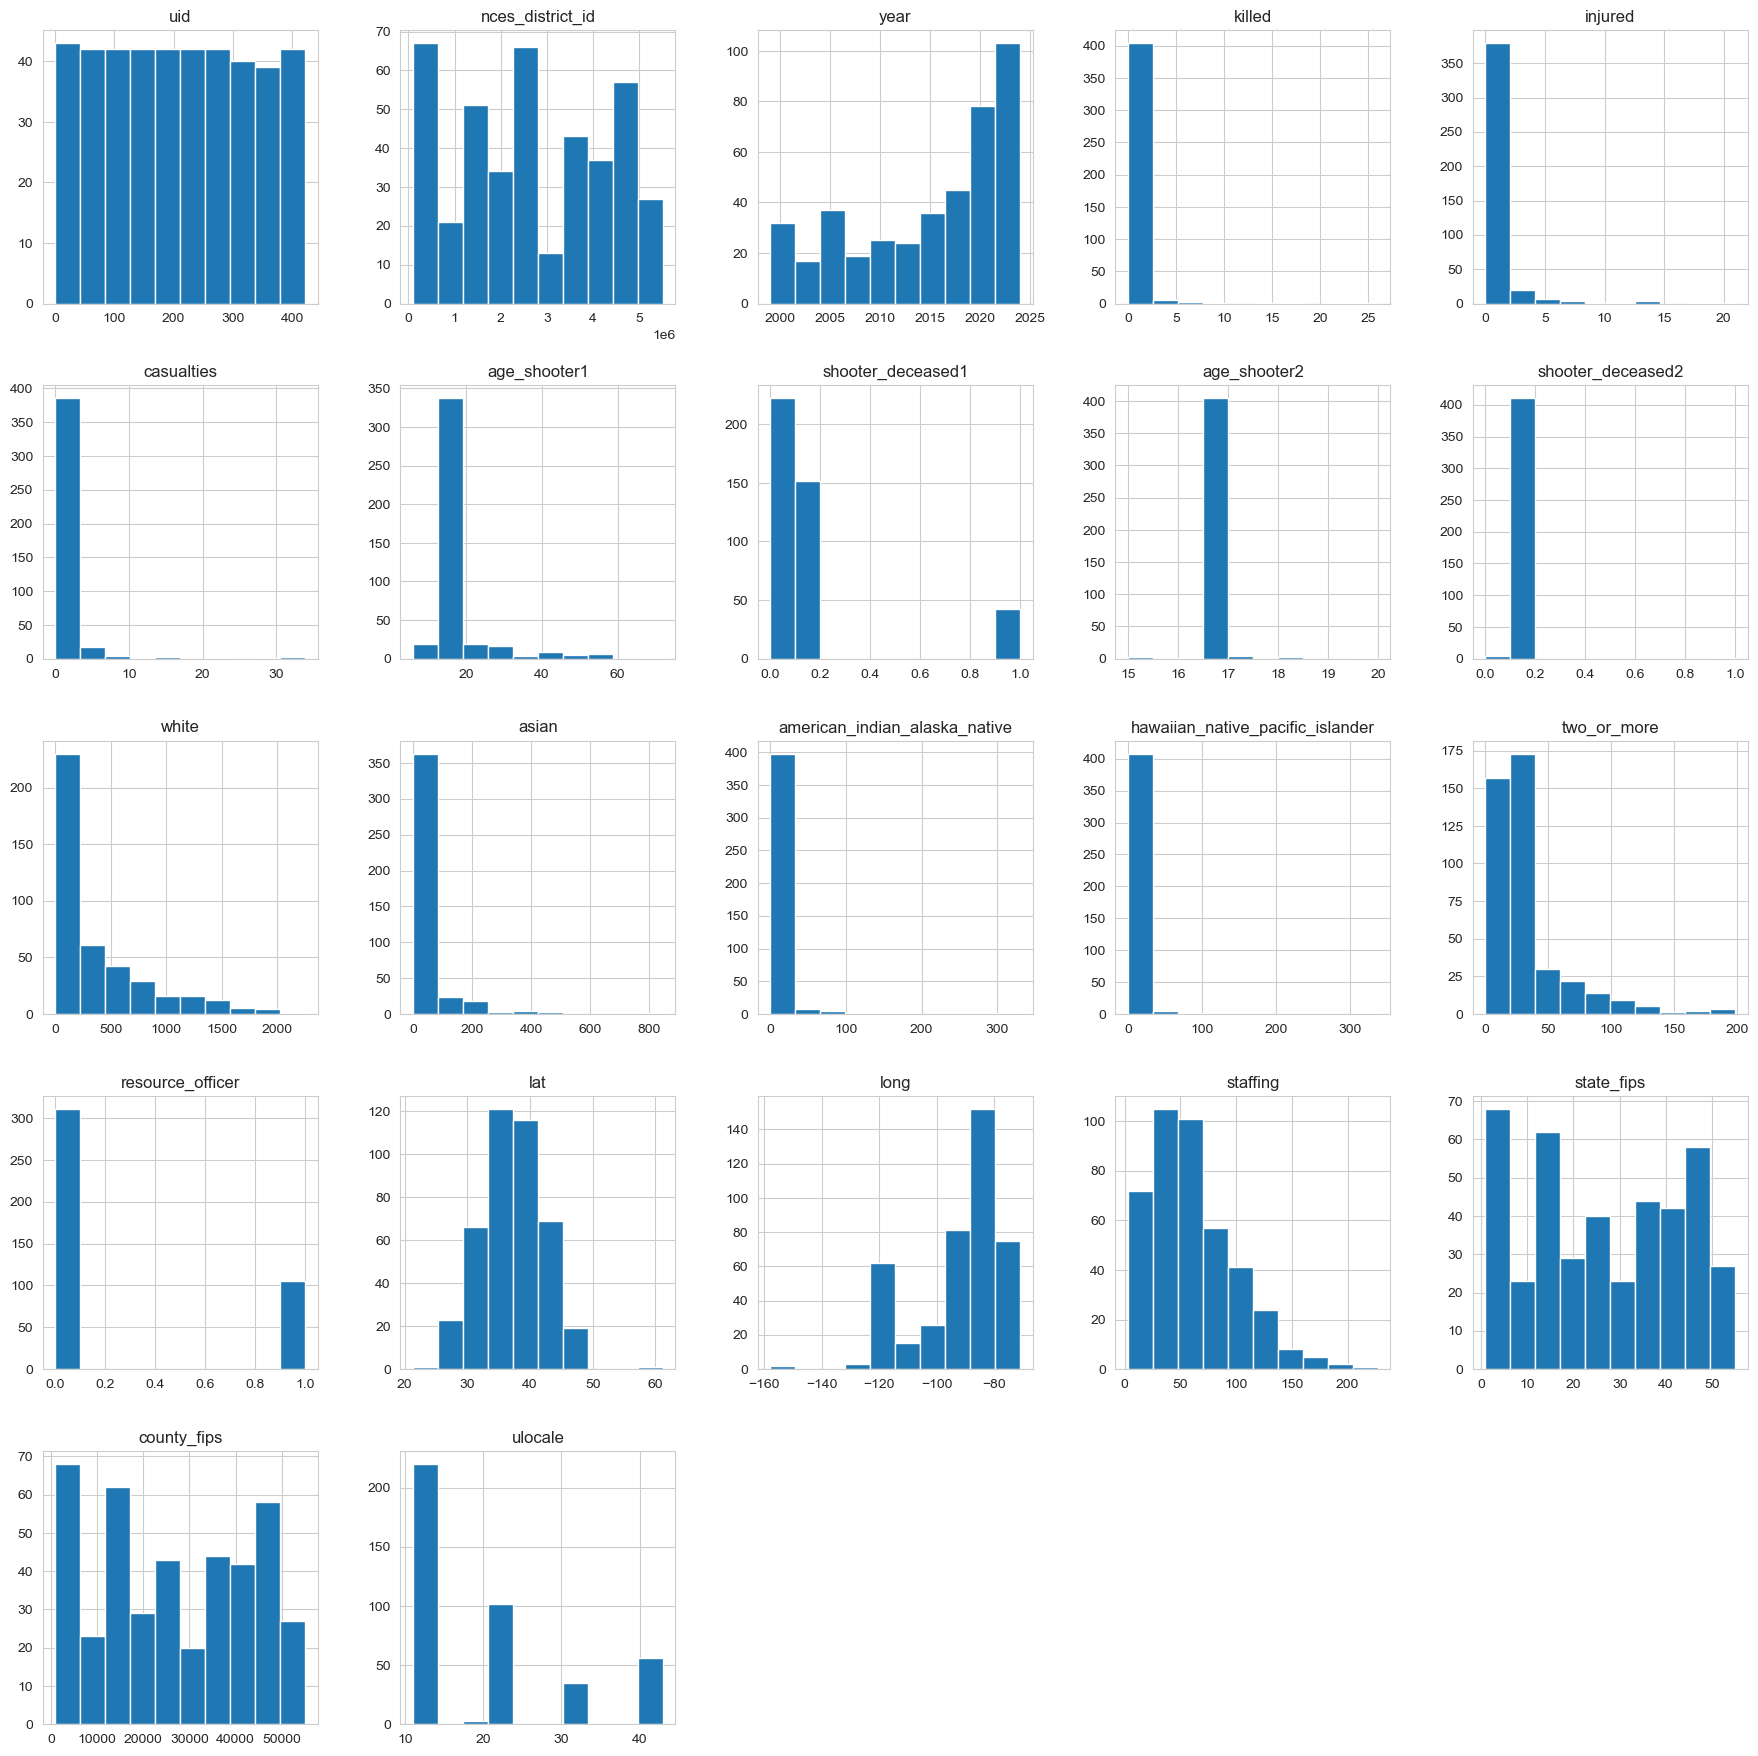

In [160]:
df.hist(figsize=(22, 22))

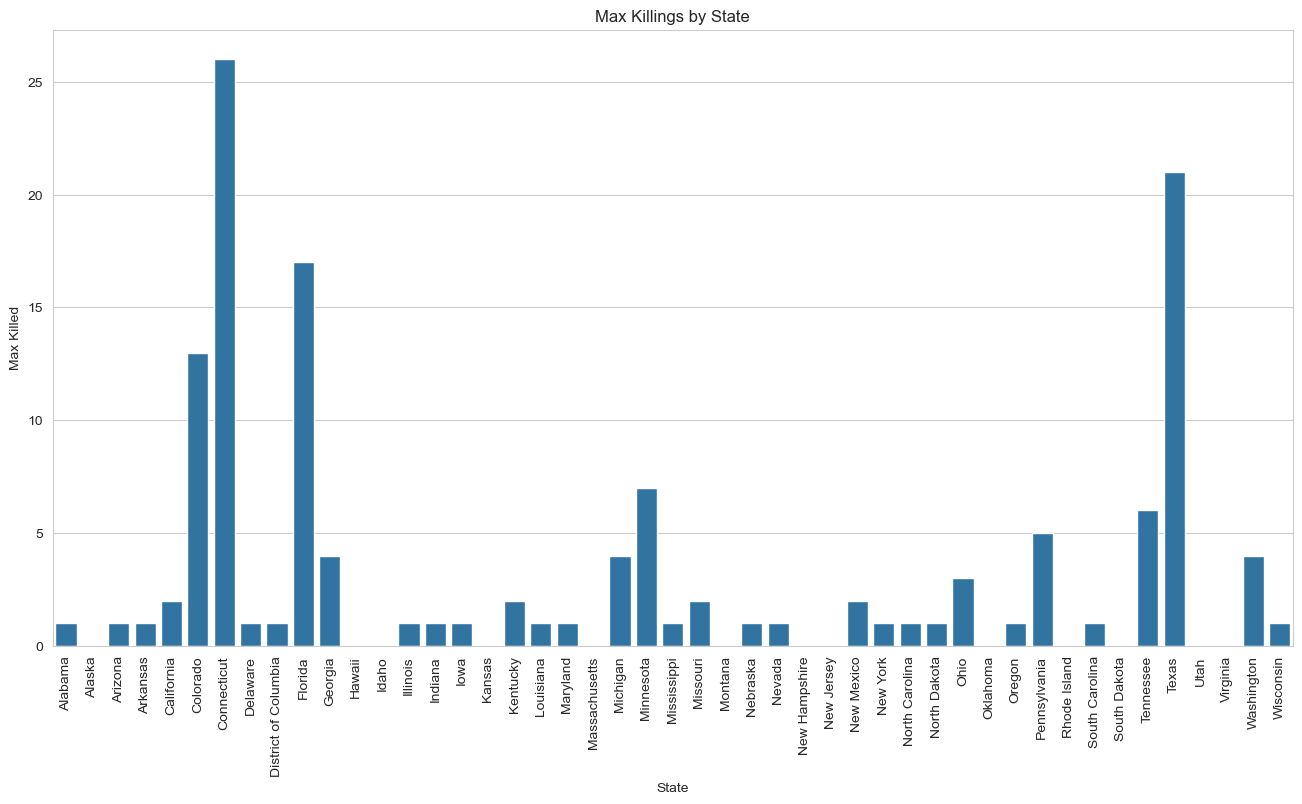

In [162]:
# Bar plot of killings by state
df_grouped = df.groupby('state')['killed'].max().reset_index()
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
sns.barplot(x='state', y='killed', data=df_grouped)
plt.title('Max Killings by State')
plt.xlabel('State')
plt.ylabel('Max Killed')
plt.xticks(rotation=90)
plt.show()

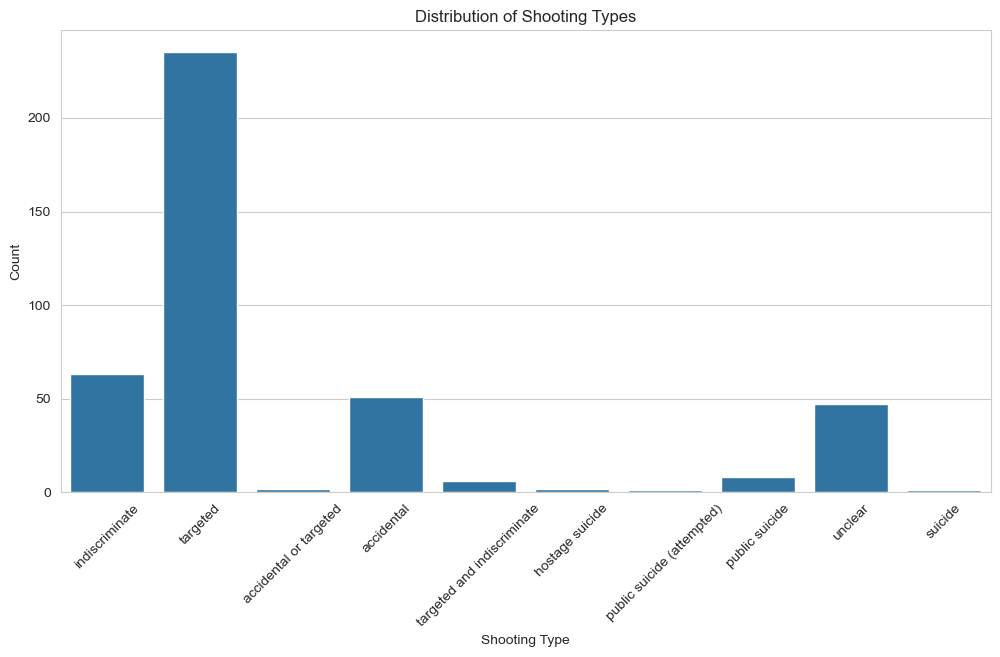

In [163]:
plt.figure(figsize=(12, 6))
sns.countplot(x='shooting_type', data=df)
plt.title('Distribution of Shooting Types')
plt.xlabel('Shooting Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

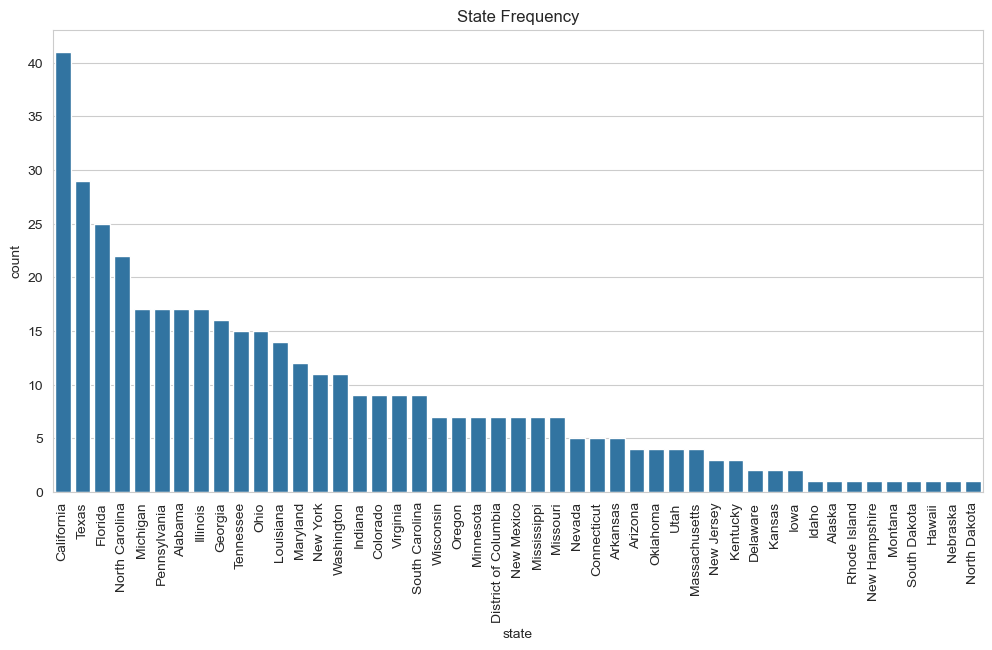

In [164]:
# Count plot for 'state'
plt.figure(figsize=(12, 6))
sns.countplot(x='state', data=df, order=df['state'].value_counts().index)
plt.title('State Frequency')
plt.xticks(rotation=90)
plt.show()

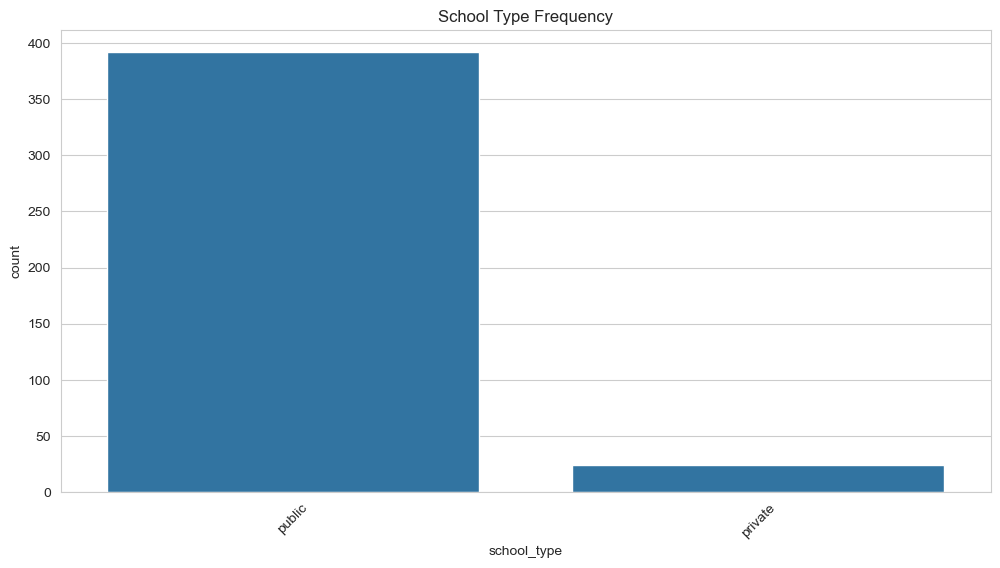

In [165]:
# Count plot for 'school_type'
plt.figure(figsize=(12, 6))
sns.countplot(x='school_type', data=df)
plt.title('School Type Frequency')
plt.xticks(rotation=45)
plt.show()

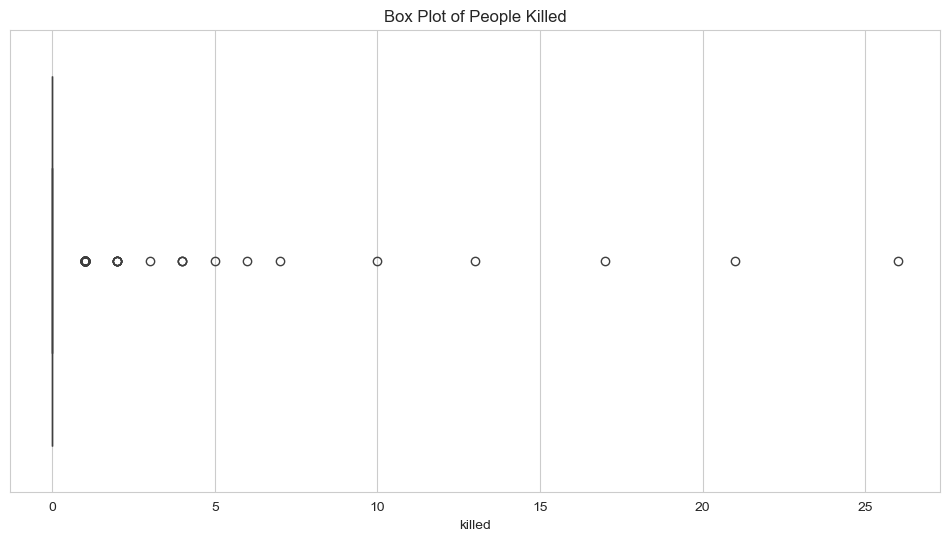

0.05    0.0
0.25    0.0
0.50    0.0
0.75    0.0
0.95    1.0
Name: killed, dtype: float64


In [167]:
# Box plot for 'killed'
plt.figure(figsize=(12, 6))
sns.boxplot(x='killed', data=df)
plt.title('Box Plot of People Killed')
plt.show()
print(df.killed.quantile([0.05, 0.25, 0.50, 0.75, 0.95]))

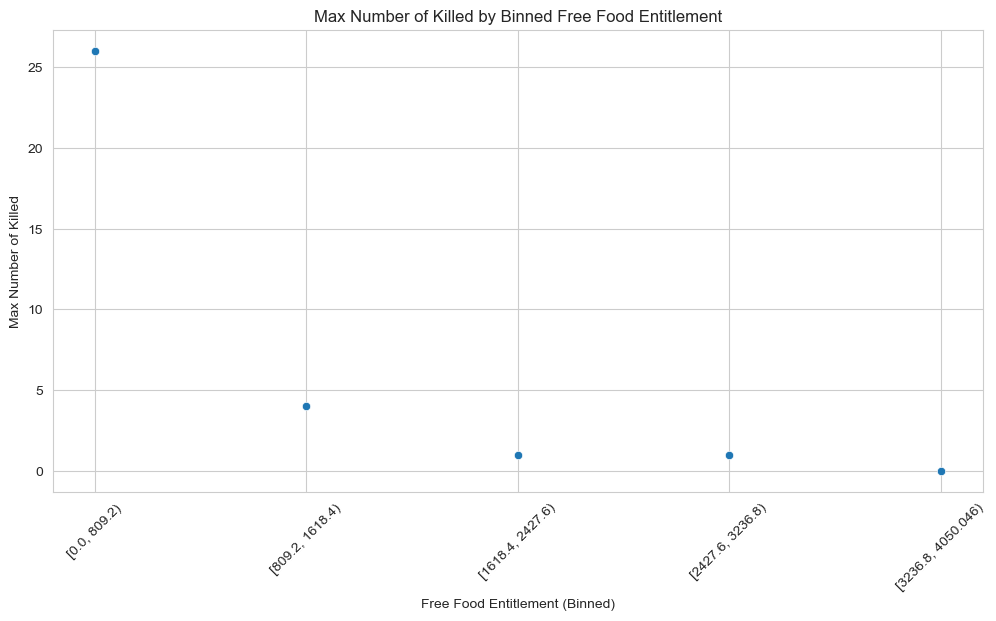

In [192]:
# Step 1: Convert 'lunch' column to numeric, coercing errors to NaN
df_lunch = df.copy()
df_lunch['lunch'] = pd.to_numeric(df_lunch['lunch'], errors='coerce')

# Step 2: Handle NaN values by replacing them with 0
df_lunch['lunch'] = df_lunch['lunch'].fillna(0)

# Step 3: Bin the 'lunch' column directly for the plot
bins = pd.cut(df_lunch['lunch'], bins=5, right=False, include_lowest=True)
binned_data = df_lunch.groupby(bins, observed=False)['killed'].max().reset_index()

# Convert binned bins to strings for plotting
binned_data['binned_str'] = binned_data[bins.name].astype(str)

# Step 4: Scatter plot between binned 'lunch' and max 'killed'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='binned_str', y='killed', data=binned_data)
plt.title('Max Number of Killed by Binned Free Food Entitlement')
plt.xlabel('Free Food Entitlement (Binned)')
plt.ylabel('Max Number of Killed')
plt.xticks(rotation=45)
plt.show()


In [200]:
df_dummies = pd.get_dummies(df)

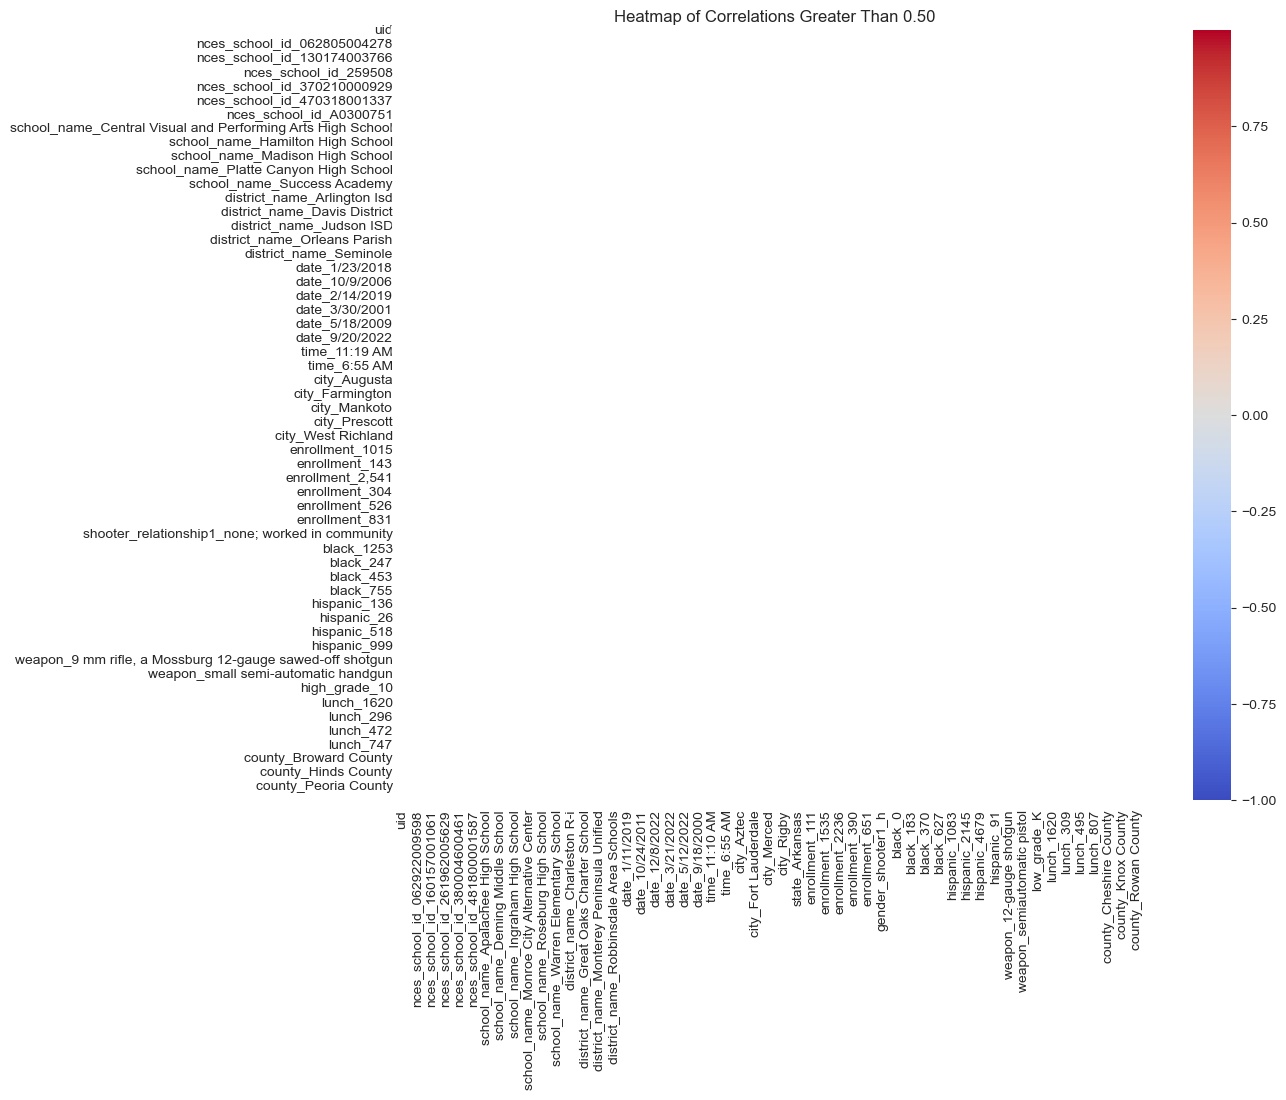

In [204]:
# Assuming df is your original DataFrame
# Compute the correlation matrix
correlation_matrix = df_dummies.corr()

# Filter the correlation matrix to keep only values with absolute correlation > 0.50
filtered_corr = correlation_matrix[(correlation_matrix.abs() > 0.90) & (correlation_matrix != 1.0)]

# Create a mask for the heatmap to hide the upper triangle
mask = filtered_corr.isna()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', mask=mask, linewidths=0.5)
plt.title('Heatmap of Correlations Greater Than 0.50')
plt.show()

In [195]:
df.columns

Index(['uid', 'nces_school_id', 'school_name', 'nces_district_id',
       'district_name', 'date', 'school_year', 'year', 'time', 'day_of_week',
       'city', 'state', 'school_type', 'enrollment', 'killed', 'injured',
       'casualties', 'shooting_type', 'age_shooter1', 'gender_shooter1',
       'race_ethnicity_shooter1', 'shooter_relationship1', 'shooter_deceased1',
       'deceased_notes1', 'age_shooter2', 'gender_shooter2',
       'race_ethnicity_shooter2', 'shooter_relationship2', 'shooter_deceased2',
       'deceased_notes2', 'white', 'black', 'hispanic', 'asian',
       'american_indian_alaska_native', 'hawaiian_native_pacific_islander',
       'two_or_more', 'resource_officer', 'weapon', 'weapon_source', 'lat',
       'long', 'staffing', 'low_grade', 'high_grade', 'lunch', 'county',
       'state_fips', 'county_fips', 'ulocale'],
      dtype='object')